<a href="https://colab.research.google.com/github/charliashby/labs/blob/main/Ashby_04HedonicPricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('airbnb_hw.csv')
df.head(10)

Saving airbnb_hw.csv to airbnb_hw (1).csv


,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0
5,1039,7/25/2008,Big Greenpoint 1BD w/ Skyline View,Brooklyn,Apartment,100.0,Entire home/apt,11222.0,1.0,1,4,149,100.0
6,1783,8/12/2008,Amazing Also,Manhattan,Apartment,100.0,Entire home/apt,10004.0,1.0,1,9,250,100.0
7,2078,8/15/2008,"Colorful, quiet, & near the subway!",Brooklyn,Apartment,90.0,Private room,11201.0,1.0,1,80,90,94.0
8,2339,8/20/2008,East Village Cocoon: 2 Bedroom Flat,Manhattan,Apartment,90.0,Entire home/apt,10009.0,2.0,1,95,270,90.0
9,2339,8/20/2008,Lovely 2 Bedroom East Village Nest,Manhattan,Apartment,95.0,Entire home/apt,10009.0,2.0,1,23,290,96.0


# Question 1

In [47]:
#cleaning
import pandas as pd

# Drop rows with missing values in critical columns
df.dropna(subset=['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type', 'Room Type', 'Zipcode'], inplace=True)

# Fill missing values in numerical columns with median values
df['Review Scores Rating (bin)'].fillna(df['Review Scores Rating (bin)'].median(), inplace=True)
df['Review Scores Rating'].fillna(df['Review Scores Rating'].median(), inplace=True)

# Convert data types
df['Zipcode'] = df['Zipcode'].astype(str)
df['Price'] = df['Price'].replace('[\$,]', '', regex=True).astype(float)

# Remove duplicates based on Host Id and Name
df.drop_duplicates(subset=['Host Id', 'Name'], keep='first', inplace=True)

# Display cleaned dataframe info
df.info()

# Save cleaned data to a new CSV file
df.to_csv('cleaned_airbnb_hw.csv', index=False)

<ipython-input-47-5312f29abf1c>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Review Scores Rating (bin)'].fillna(df['Review Scores Rating (bin)'].median(), inplace=True)
<ipython-input-47-5312f29abf1c>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 30477
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Host Id                     30162 non-null  int64  
 1   Host Since                  30162 non-null  object 
 2   Name                        30162 non-null  object 
 3   Neighbourhood               30162 non-null  object 
 4   Property Type               30162 non-null  object 
 5   Review Scores Rating (bin)  30162 non-null  float64
 6   Room Type                   30162 non-null  object 
 7   Zipcode                     30162 non-null  object 
 8   Beds                        30078 non-null  float64
 9   Number of Records           30162 non-null  int64  
 10  Number Of Reviews           30162 non-null  int64  
 11  Price                       30162 non-null  float64
 12  Review Scores Rating        30162 non-null  float64
dtypes: float64(4), int64(3), object(6)
m

            Host Id  Review Scores Rating (bin)          Beds  \
count  3.016200e+04                30162.000000  30078.000000   
mean   1.272725e+07                   90.532624      1.529224   
std    1.189615e+07                    7.724339      1.015258   
min    5.000000e+02                   20.000000      0.000000   
25%    2.702246e+06                   90.000000      1.000000   
50%    8.548076e+06                   90.000000      1.000000   
75%    2.119168e+07                   95.000000      2.000000   
max    4.303307e+07                  100.000000     16.000000   

       Number of Records  Number Of Reviews         Price  \
count            30162.0       30162.000000  30162.000000   
mean                 1.0          11.986871    153.453485   
std                  0.0          21.916222    108.630906   
min                  1.0           0.000000     10.000000   
25%                  1.0           0.000000     82.000000   
50%                  1.0           3.000000    1

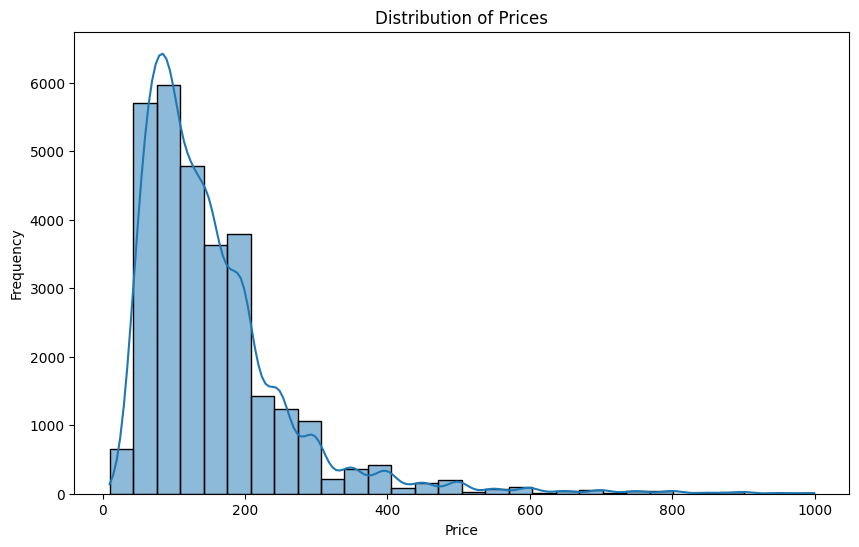

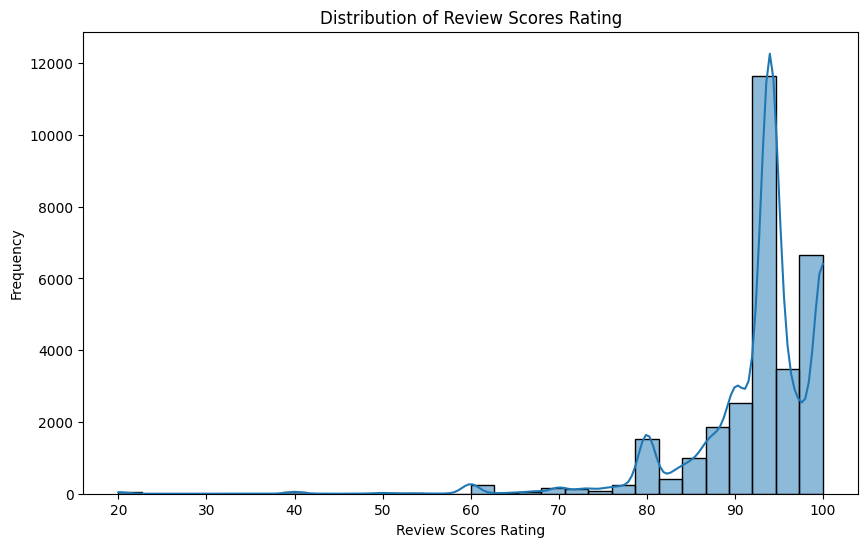

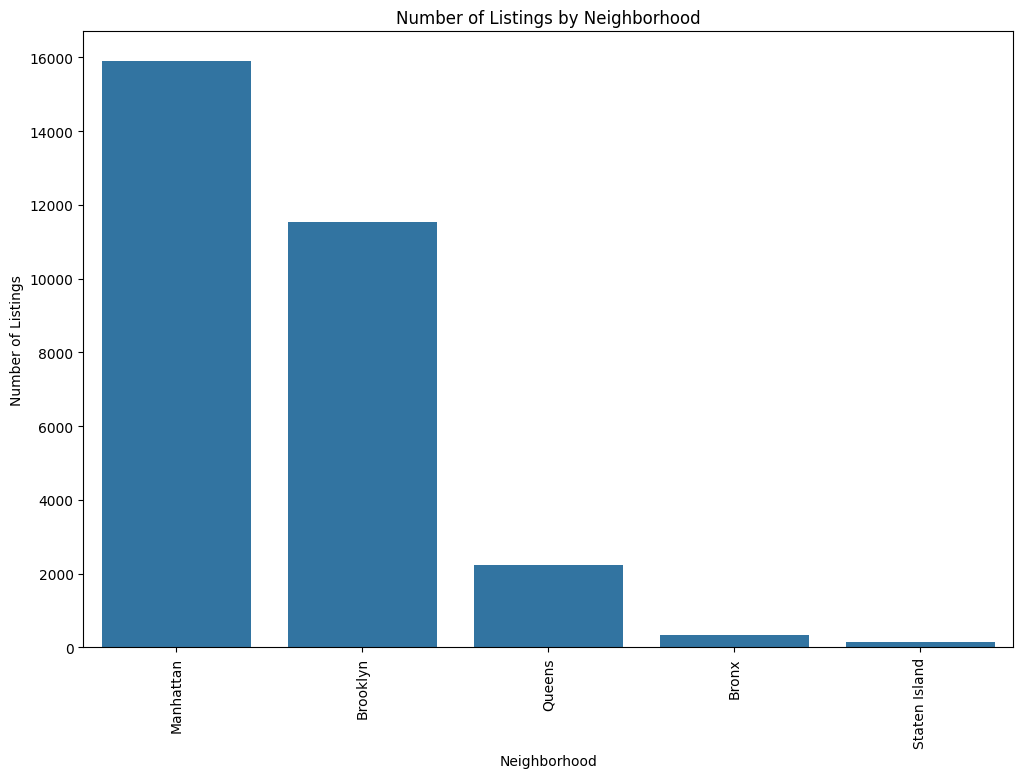

In [49]:
#EDA

import matplotlib.pyplot as plt
import seaborn as sns

print(df.describe())

missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Visualize the distribution of prices
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'].dropna(), bins=30, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution of review scores
plt.figure(figsize=(10, 6))
sns.histplot(df['Review Scores Rating'].dropna(), bins=30, kde=True)
plt.title('Distribution of Review Scores Rating')
plt.xlabel('Review Scores Rating')
plt.ylabel('Frequency')
plt.show()

# Analyze the number of listings by neighborhood
neighborhood_counts = df['Neighbourhood '].value_counts()
plt.figure(figsize=(12, 8))
sns.barplot(x=neighborhood_counts.index, y=neighborhood_counts.values)
plt.title('Number of Listings by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Listings')
plt.xticks(rotation=90)
plt.show()


# Question 2


In [50]:
categorical_columns = ['Neighbourhood ', 'Property Type', 'Room Type']
# Perform one-hot encoding on categorical columns
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Save the transformed data to a new CSV file
df.to_csv('transformed_airbnb_hw.csv', index=False)

In [51]:
df.head(10)

,Host Id,Host Since,Name,Review Scores Rating (bin),Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating,...,Property Type_Hut,Property Type_Lighthouse,Property Type_Loft,Property Type_Other,Property Type_Tent,Property Type_Townhouse,Property Type_Treehouse,Property Type_Villa,Room Type_Private room,Room Type_Shared room
0,5162530,2008-01-01,1 Bedroom in Prime Williamsburg,90.0,11249.0,1.0,1,0,145.0,94.0,...,False,False,False,False,False,False,False,False,False,False
1,33134899,2008-01-01,"Sunny, Private room in Bushwick",90.0,11206.0,1.0,1,1,37.0,94.0,...,False,False,False,False,False,False,False,False,True,False
2,39608626,2008-01-01,Sunny Room in Harlem,90.0,10032.0,1.0,1,1,28.0,94.0,...,False,False,False,False,False,False,False,False,True,False
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,90.0,10024.0,3.0,1,0,199.0,94.0,...,False,False,False,False,False,False,False,False,False,False
4,500,6/26/2008,Trendy Times Square Loft,95.0,10036.0,3.0,1,39,549.0,96.0,...,False,False,False,False,False,False,False,False,True,False
5,1039,7/25/2008,Big Greenpoint 1BD w/ Skyline View,100.0,11222.0,1.0,1,4,149.0,100.0,...,False,False,False,False,False,False,False,False,False,False
6,1783,8/12/2008,Amazing Also,100.0,10004.0,1.0,1,9,250.0,100.0,...,False,False,False,False,False,False,False,False,False,False
7,2078,8/15/2008,"Colorful, quiet, & near the subway!",90.0,11201.0,1.0,1,80,90.0,94.0,...,False,False,False,False,False,False,False,False,True,False
8,2339,8/20/2008,East Village Cocoon: 2 Bedroom Flat,90.0,10009.0,2.0,1,95,270.0,90.0,...,False,False,False,False,False,False,False,False,False,False
9,2339,8/20/2008,Lovely 2 Bedroom East Village Nest,95.0,10009.0,2.0,1,23,290.0,96.0,...,False,False,False,False,False,False,False,False,False,False


# Question 3


In [52]:
X = df.drop(columns=['Price'])
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_test.to_csv('test_features.csv', index=False)
y_test.to_csv('test_target.csv', index=False)


# Question 4


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

df.dropna(subset=['Price', 'Beds', 'Review Scores Rating'], inplace=True)

X = df[['Beds', 'Review Scores Rating']]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the training data
train_predictions = model.predict(X_train)

# Predict on the test data
test_predictions = model.predict(X_test)

# Calculate RMSE for training data
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
print(f'Training RMSE: {train_rmse}')

# Calculate RMSE for test data
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
print(f'Test RMSE: {test_rmse}')

Training RMSE: 97.7395639123691
Test RMSE: 102.22456734119824


# Question 5


In [56]:
from sklearn.preprocessing import PolynomialFeatures

df.dropna(subset=['Price', 'Beds', 'Review Scores Rating'], inplace=True)

# Define features and target variable
X = df[['Beds', 'Review Scores Rating']]
y = df['Price']

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create polynomial features and interaction terms
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Initialize the linear regression model
model_poly = LinearRegression()

# Fit the model on the training data with polynomial features
model_poly.fit(X_train_poly, y_train)

# Predict on the training data
train_predictions_poly = model_poly.predict(X_train_poly)

# Predict on the test data
test_predictions_poly = model_poly.predict(X_test_poly)

# Calculate RMSE for training data
train_rmse_poly = np.sqrt(mean_squared_error(y_train, train_predictions_poly))
print(f'Training RMSE (Polynomial): {train_rmse_poly}')

# Calculate RMSE for test data
test_rmse_poly = np.sqrt(mean_squared_error(y_test, test_predictions_poly))
print(f'Test RMSE (Polynomial): {test_rmse_poly}')

# Calculate R^2 for training data
train_r2_poly = model_poly.score(X_train_poly, y_train)
print(f'Training R^2 (Polynomial): {train_r2_poly}')

# Calculate R^2 for test data
test_r2_poly = model_poly.score(X_test_poly, y_test)
print(f'Test R^2 (Polynomial): {test_r2_poly}')

Training RMSE (Polynomial): 96.29878207637896
Test RMSE (Polynomial): 101.69544543745151
Training R^2 (Polynomial): 0.19655762660772724
Test R^2 (Polynomial): 0.1881288005663967


# Question 6

Simple Model Performance:

Training RMSE: 97.74, Test RMSE: 102.22


Complex Model Performance:

Training RMSE (Polynomial): 96.30, Test RMSE (Polynomial): 101.70

Training R^2: 0.197, Test R^2: 0.188


Comparison: The complex model shows a slight improvement in both training and test RMSE compared to the simple model, indicating better fit. The R^2 values are relatively low, suggesting that the model does not explain much variance in the target variable.


Selection: While the complex model performs slightly better, the low R^2 values indicate that further feature engineering or different modeling approaches might be necessary to capture more variance

This code was generated with ChatGPT